https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Intro Basic**

In [2]:
data = pd.read_csv('singapore_2019_airbnb.csv')

**Early Data Exploratory**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3717 non-null   int64  
 1   id                              3717 non-null   int64  
 2   name                            3717 non-null   object 
 3   host_id                         3717 non-null   int64  
 4   host_name                       3717 non-null   object 
 5   neighbourhood_group             3717 non-null   object 
 6   neighbourhood                   3717 non-null   object 
 7   latitude                        3717 non-null   float64
 8   longitude                       3717 non-null   float64
 9   room_type                       3717 non-null   object 
 10  price                           3717 non-null   int64  
 11  minimum_nights                  3717 non-null   int64  
 12  number_of_reviews               37

In [17]:
data = data.drop(['Unnamed: 0'],axis=1)

In [40]:
data.shape

(3717, 16)

In [39]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.717000e+03,3.717000e+03,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,2.356783e+07,9.081024e+07,1.311288,103.851552,151.221684,7.869249,24.558515,1.363110,38.170030,212.356739
std,9.808374e+06,8.304817e+07,0.027353,0.040573,123.072584,17.917813,39.291199,1.372758,62.511077,132.768175
min,7.160900e+04,2.366600e+04,1.245260,103.687790,0.000000,1.000000,1.000000,0.020000,1.000000,0.000000
25%,1.668045e+07,2.114972e+07,1.295440,103.838830,69.000000,1.000000,2.000000,0.400000,3.000000,75.000000
50%,2.532846e+07,5.985067e+07,1.309950,103.850050,122.000000,2.000000,9.000000,0.900000,10.000000,253.000000
75%,3.180778e+07,1.564097e+08,1.317160,103.876550,190.000000,5.000000,29.000000,1.910000,38.000000,343.000000
max,3.785242e+07,2.823325e+08,1.452030,103.973420,2943.000000,180.000000,323.000000,13.000000,274.000000,365.000000


In [41]:
data.nunique()

id                                3717
name                              3582
host_id                           1124
host_name                          845
neighbourhood_group                  5
neighbourhood                       40
latitude                          2769
longitude                         2956
room_type                            3
price                              286
minimum_nights                      34
number_of_reviews                  206
last_review                        238
reviews_per_month                  523
calculated_host_listings_count      54
availability_365                   352
dtype: int64

In [43]:
sorted(data['minimum_nights'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 18,
 20,
 21,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 60,
 75,
 80,
 89,
 90,
 92,
 93,
 100,
 180]

In [18]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.519442,-0.057326,-0.061951,0.130836,-0.066710,-0.504007,0.081555,0.118364,-0.073341
host_id,0.519442,1.000000,-0.044409,-0.052236,0.087621,-0.119084,-0.236364,0.100034,-0.145171,-0.045424
latitude,-0.057326,-0.044409,1.000000,0.000114,-0.206577,0.048784,0.019926,0.014265,-0.115187,-0.043548
longitude,-0.061951,-0.052236,0.000114,1.000000,-0.018532,-0.022081,0.128697,0.116465,0.036307,-0.111559
price,0.130836,0.087621,-0.206577,-0.018532,1.000000,-0.074698,-0.083336,0.000678,0.092940,0.077407
minimum_nights,-0.066710,-0.119084,0.048784,-0.022081,-0.074698,1.000000,-0.002963,-0.121606,0.169970,0.051658
number_of_reviews,-0.504007,-0.236364,0.019926,0.128697,-0.083336,-0.002963,1.000000,0.594078,-0.200370,-0.098236
reviews_per_month,0.081555,0.100034,0.014265,0.116465,0.000678,-0.121606,0.594078,1.000000,-0.277400,-0.206959
calculated_host_listings_count,0.118364,-0.145171,-0.115187,0.036307,0.092940,0.169970,-0.200370,-0.277400,1.000000,0.178629
availability_365,-0.073341,-0.045424,-0.043548,-0.111559,0.077407,0.051658,-0.098236,-0.206959,0.178629,1.000000


<AxesSubplot:>

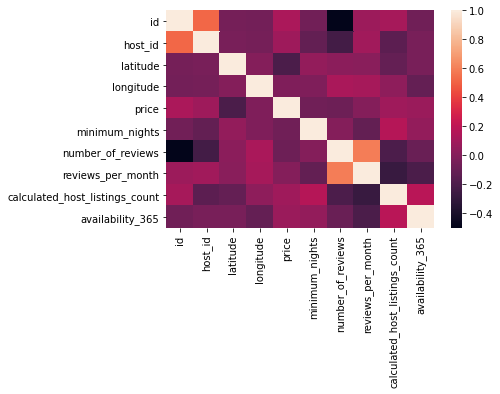

In [19]:
sns.heatmap(data.corr())

<AxesSubplot:>

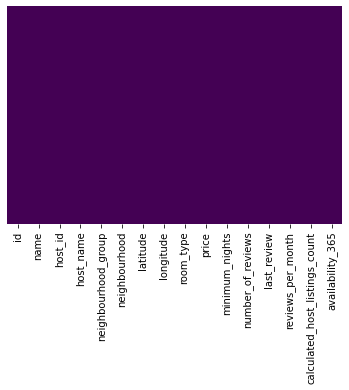

In [27]:
#check for na values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

F:\Coding\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

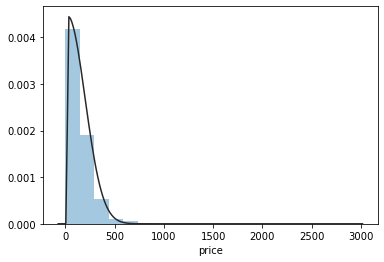

<Figure size 1440x1440 with 0 Axes>

In [58]:
from scipy.stats import skewnorm
sns.distplot(data['price'],fit = skewnorm,kde=False,bins=20)

plt.figure(figsize=(20,20))

<AxesSubplot:xlabel='price'>

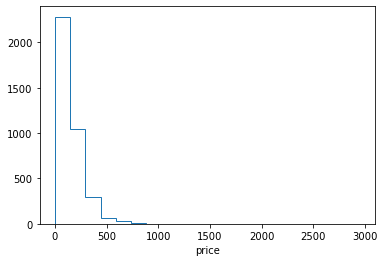

In [38]:
sns.distplot(data['price'],kde=False,bins=20, 
             hist_kws = {'alpha':1,'histtype':'step'})

bins = size

RELATIONSHIP ANALYSIS

In [45]:
#relationship analysis

<AxesSubplot:>

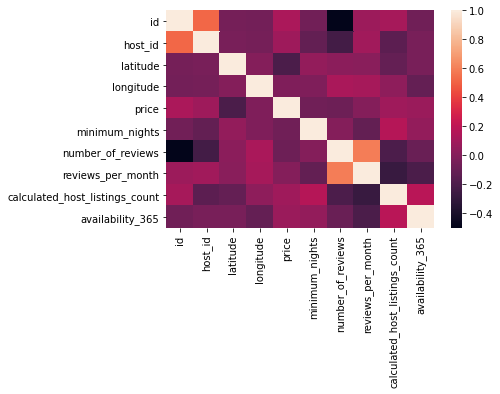

In [52]:
c=data.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=False)

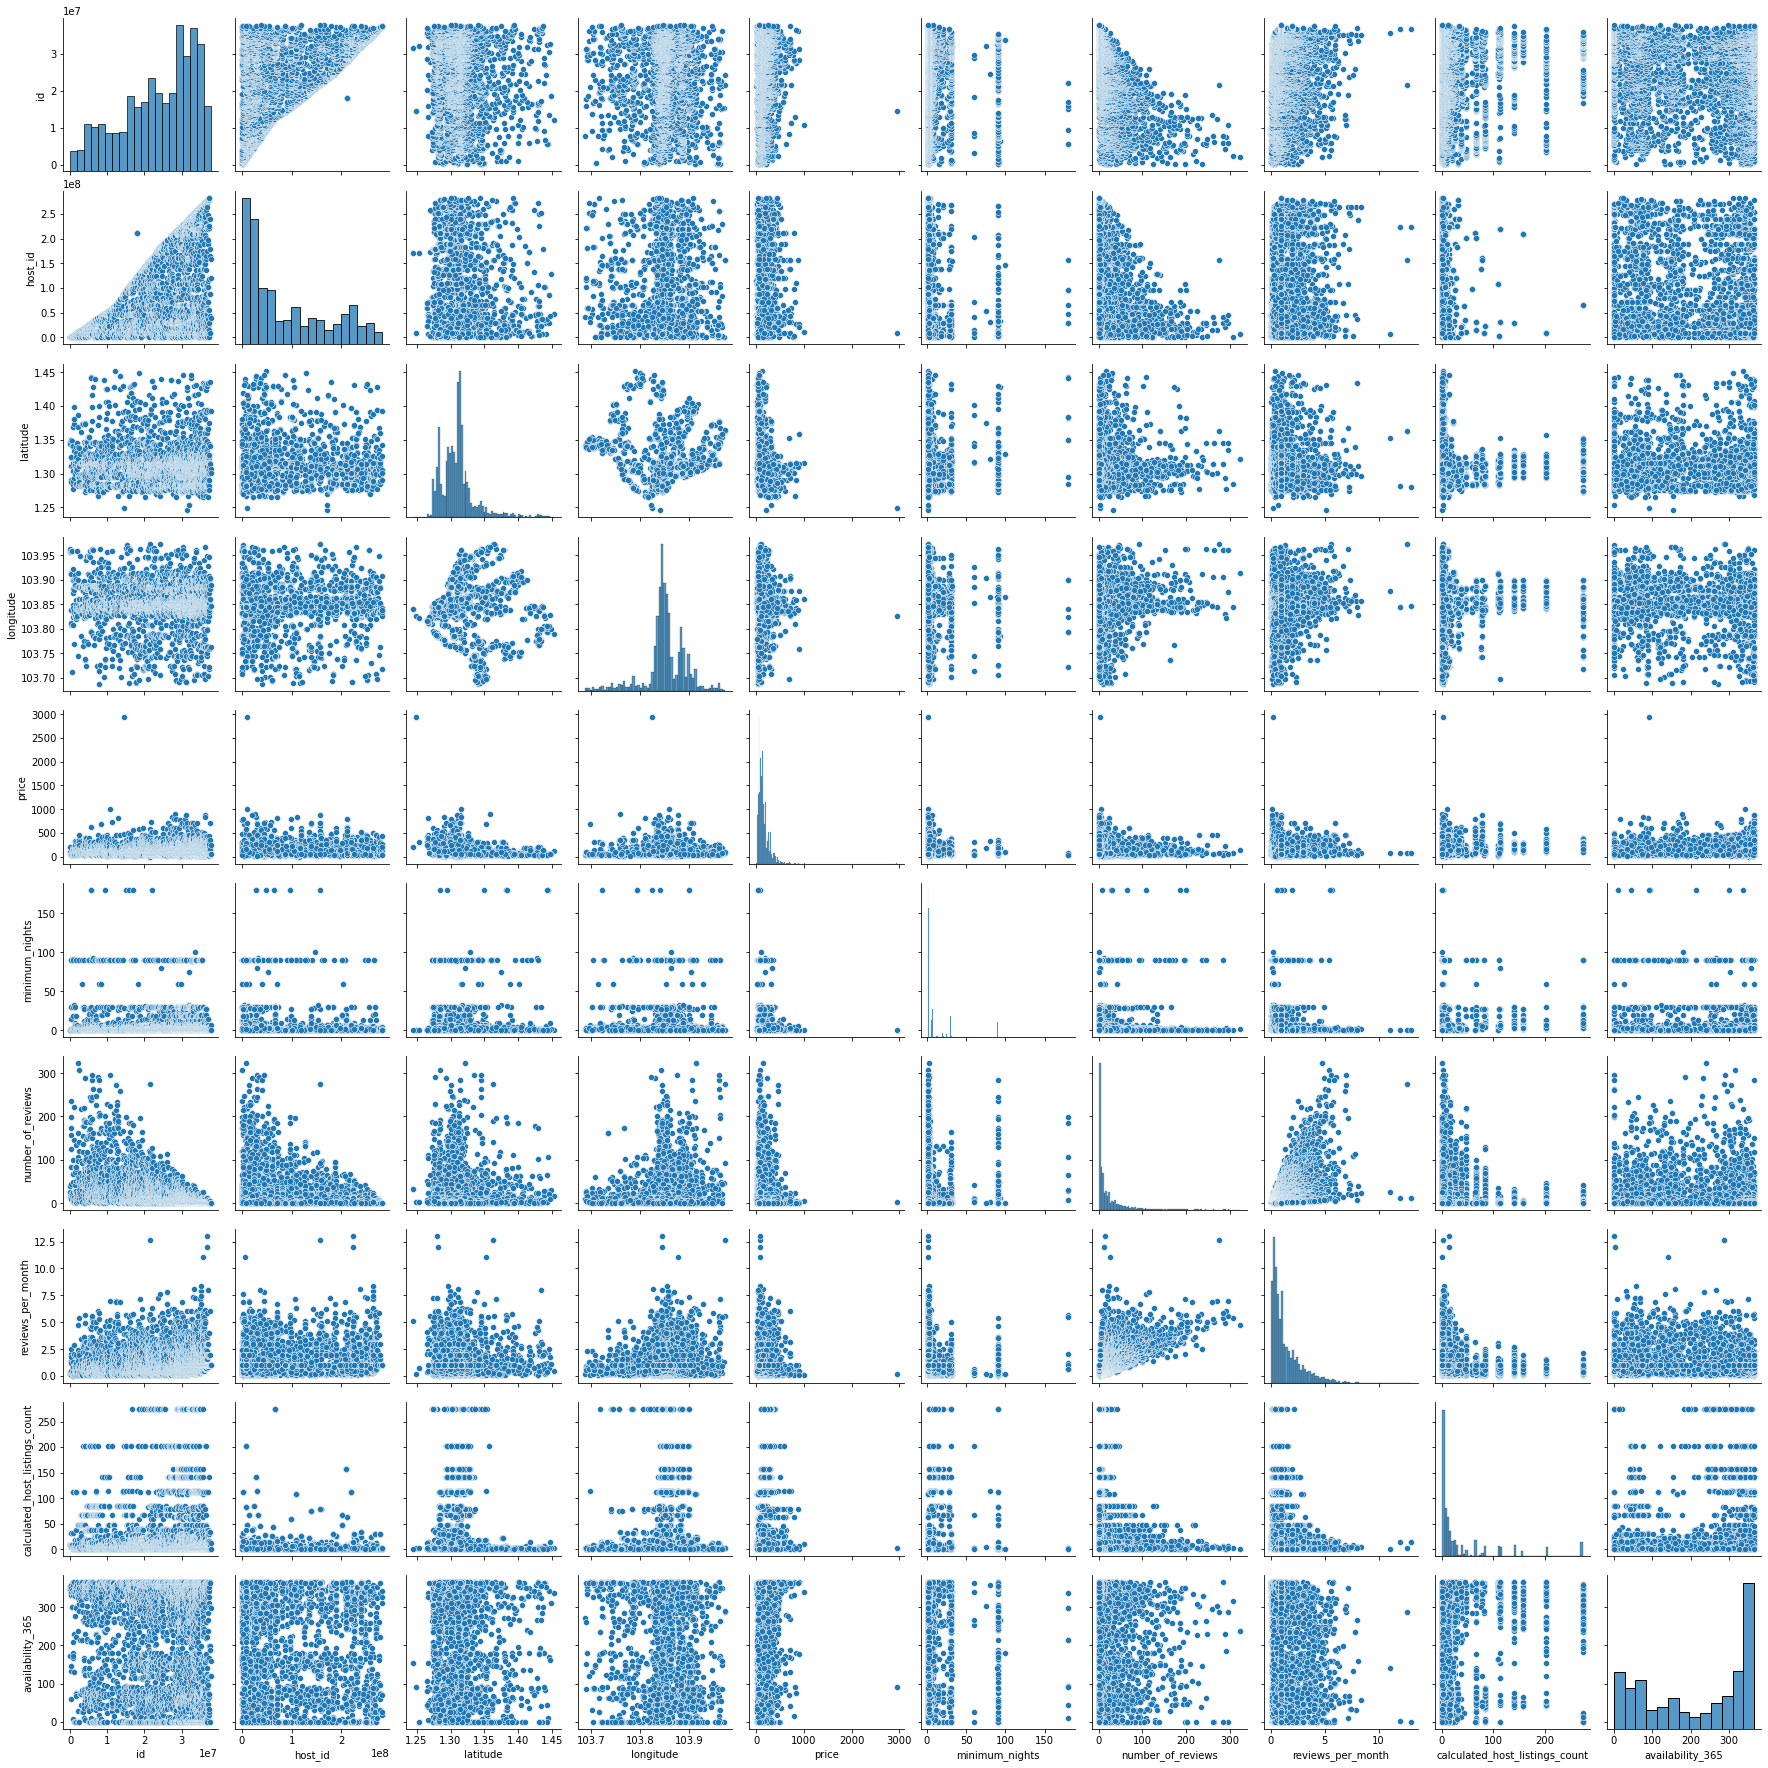

In [53]:
sns.pairplot(data)

In [ ]:
x =
y =
c =

sns.relplot(x,y,kind='Scatter',c)

In [ ]:
sns.catplot